In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def generate_gaussian_data(mean, cov, num_samples):
    return np.random.multivariate_normal(mean, cov, num_samples)


In [ ]:
def gaussian(x, mean, cov):
    """Multivariate Gaussian distribution."""
    return multivariate_normal(mean=mean, cov=cov).pdf(x)

In [ ]:
def e_step(X, means, covariances, weights):
    """Expectation step: Update the responsibilities (posterior probabilities)."""
    N, K = len(X), len(means)
    responsibilities = np.zeros((N, K))

    for n in range(N):
        total_prob = sum([weights[k] * gaussian(X[n], means[k], covariances[k]) for k in range(K)])
        for k in range(K):
            responsibilities[n, k] = weights[k] * gaussian(X[n], means[k], covariances[k]) / total_prob
    return responsibilities

In [ ]:
def m_step(X, responsibilities):
    """Maximization step: Update the means, covariances, and weights."""
    N, D = X.shape
    K = responsibilities.shape[1]

    N_k = responsibilities.sum(axis=0)

    means = np.dot(responsibilities.T, X) / N_k[:, None]
    covariances = []

    for k in range(K):
        diff = X - means[k]
        weighted_cov = np.dot((responsibilities[:, k] * diff.T), diff) / N_k[k]
        covariances.append(weighted_cov)

    weights = N_k / N
    return means, covariances, weights

In [ ]:
def log_likelihood(X, means, covariances, weights):
    """Compute the log-likelihood of the current model."""
    N, K = X.shape[0], len(means)
    log_likelihood = 0.0
    for n in range(N):
        temp = 0.0
        for k in range(K):
            temp += weights[k] * gaussian(X[n], means[k], covariances[k])
        log_likelihood += np.log(temp)
    return log_likelihood

In [ ]:
# EM Algorithm
def em_algorithm(X, K, max_iter=100, tol=1e-6):
    N, D = X.shape
    means = np.random.rand(K, D)
    covariances = [np.eye(D) for _ in range(K)]
    weights = np.ones(K) / K
    log_likelihood_values = []

    for i in range(max_iter):
        responsibilities = e_step(X, means, covariances, weights)

        means, covariances, weights = m_step(X, responsibilities)

        ll = log_likelihood(X, means, covariances, weights)
        log_likelihood_values.append(ll)

        if i > 0 and abs(log_likelihood_values[-1] - log_likelihood_values[-2]) < tol:
            break

    return means, covariances, weights, log_likelihood_values

In [ ]:
mean1 = [0, 0]
cov1 = [[1.0, 0.5], [0.5, 1.0]]
mean2 = [3, 3]
cov2 = [[1.0, -0.7], [-0.7, 1.0]]

n_samples = 300

data1 = generate_gaussian_data(mean1, cov1, n_samples)
data2 = generate_gaussian_data(mean2, cov2, n_samples)

X = np.vstack((data1, data2))

K = 2
N, D = X.shape

np.random.seed(42)
means = np.random.rand(K, D)
covariances = [np.eye(D)] * K
weights = np.ones(K) / K
responsibilities = np.zeros((N, K))

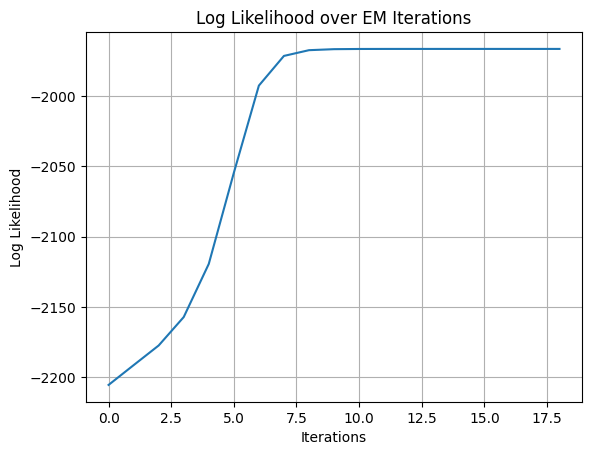

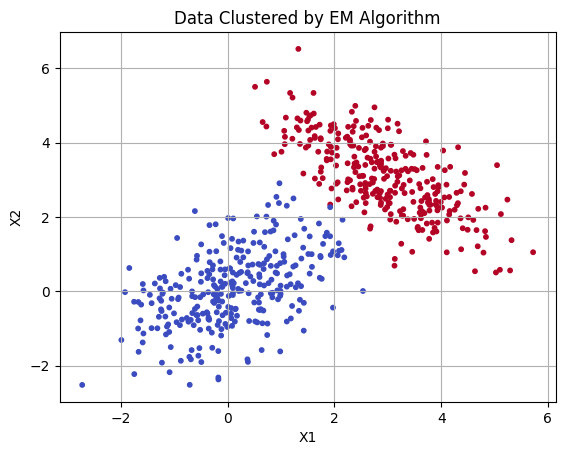

In [ ]:
means, covariances, weights, ll_values = em_algorithm(X, K)

plt.plot(ll_values)
plt.title('Log Likelihood over EM Iterations')
plt.xlabel('Iterations')
plt.ylabel('Log Likelihood')
plt.grid(True)
plt.show()

responsibilities = e_step(X, means, covariances, weights)
labels = np.argmax(responsibilities, axis=1)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='coolwarm')
plt.title('Data Clustered by EM Algorithm')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()
